<a href="https://colab.research.google.com/github/YugyeongJo/Movie-Dataset_Analysis_Project/blob/main/data_analysis/Chang/Analysis_Files/The_Story_of_Film_07_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Story of Film**

https://www.kaggle.com/code/rounakbanik/the-story-of-film/notebook  


The birth of the Motion Picture Camera in the late 18th century gave birth to possibly the most potent form of entertainment in existence: Cinema. Movies have managed to enthrall audiences ever since one second clips of racing horses emerged in the 1890s to the introduction of sound in the 1920s to the birth of color in the 1930s to mainstream 3D Movies in the early 2010s.

Cinema had humble origins in terms of plot, direction and acting (mainly due to its extremely short duration in its early days) but since then, movie industries around the world have been blessed with creative geniuses in the form of directors, screenwriters, actors, sound designers and cinematographers. It has also spread itself into a plethora of genres ranging from romance to comedy to science fiction to horror.

As with almost every kid born in the last century, I was amazed by movies. I was addicted to it. And I've always wanted to know more about the enigmatic world of cinema. In this notebook, I will try and gain some insights using data. With us, we have a dataset of about 45000 movies with metadata collected from TMDB. Using this data, we will try and answer various questions that I've always had about movies.  

  

## In this notebook, I will also try and build the following:

 - A Regressor that can, to a certain degree, predict the revenue of a particular movie.
 - A Classifier that identifies if a movie will be a hit or will make the producers lose money.

-----------------


 18세기 후반에 탄생한 영화 촬영 카메라는 아마도 가장 강력한 형태의 오락인 '영화'를 탄생시켰습니다. 1890년대 경주마의 1초짜리 클립에서 1920년대에 사운드가 도입되고, 1930년대에 컬러 영화가 탄생하며, 2010년대 초반에 주류 3D 영화가 등장하기까지 영화는 관객들을 매료시키는 데 성공했습니다.

영화는 줄거리, 연출, 연기 면에서 겸손한 시작을 했습니다(주로 초기 영화의 매우 짧은 길이 때문이었음). 하지만 그 이후로 전 세계의 영화 산업은 감독, 시나리오 작가, 배우, 음향 디자이너, 촬영 감독과 같은 창의적인 천재들로 축복받았습니다. 또한, 로맨스, 코미디, 공상 과학, 공포 등 다양한 장르로 확장되었습니다.

지난 세기에 태어난 거의 모든 아이들과 마찬가지로, 저도 영화에 매료되었습니다. 저는 영화에 중독되었습니다. 그리고 저는 항상 영화의 신비로운 세계에 대해 더 알고 싶어 했습니다. 이 노트북에서는 데이터를 사용하여 몇 가지 통찰력을 얻고자 합니다. 우리에게는 TMDB에서 수집한 약 45,000편의 영화 메타데이터가 있는 데이터셋이 있습니다. 이 데이터를 사용하여 제가 항상 궁금해했던 다양한 질문에 답해보려고 합니다.

## 이 노트북에서는 다음과 같은 작업도 시도해 보겠습니다:

 - 특정 영화의 수익을 어느 정도 예측할 수 있는 회귀 모델
 - 영화가 히트할지 아니면 제작자에게 손해를 입힐지 식별하는 분류 모델

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# %matplotlib inline # matplotlib으로 생성한 그래프를 노트북의 셀 안에 인라인으로 표시해주는 것
                   # Colab에서는 어짜피 바로 보여주니까 굳이 필요 없음
from IPython.display import Image, HTML # Image와 HTML콘턴츠 표시하는 데 사용
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
# plotly.tools.set_credentials_file(username = 'rounakbanik', api_key = 'xTLaHBy9MVv5szF4Pwan') # 이녀석 api_key를 캐글에 올려?

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/SeSAC/Mini_Project/data/original_movie_data/movies_metadata.csv')
df.head().transpose() # 행/열 전환

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [4]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

# Features
 - adult: Indicates if the movie is X-Rated or Adult.
 - belongs_to_collection: A stringified dictionary that gives information on the movie series the particular film belongs to.
 - budget: The budget of the movie in dollars.
 - genres: A stringified list of dictionaries that list out all the genres associated with the movie.
 - homepage: The Official Homepage of the move.
 - id: The ID of the move.
 - imdb_id: The IMDB ID of the movie.
 - original_language: The language in which the movie was originally shot in.
 - original_title: The original title of the movie.
 - overview: A brief blurb of the movie.
 - popularity: The Popularity Score assigned by TMDB.
 - poster_path: The URL of the poster image.
 - production_companies: A stringified list of production companies involved with the making of the movie.
 - production_countries: A stringified list of countries where the movie was shot/produced in.
 - release_date: Theatrical Release Date of the movie.
 - revenue: The total revenue of the movie in dollars.
 - runtime: The runtime of the movie in minutes.
 - spoken_languages: A stringified list of spoken languages in the film.
 - status: The status of the movie (Released, To Be Released, Announced, etc.)
 - tagline: The tagline of the movie.
 - title: The Official Title of the movie.
 - video: Indicates if there is a video present of the movie with TMDB.
 - vote_average: The average rating of the movie.
 - vote_count: The number of votes by users, as counted by TMDB.

In [5]:
df.shape

(45466, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

There are a total of 45,466 movies with 24 features. Most of the features have very few NaN values (apart from homepage and tagline). We will attempt at cleaning this dataset to a form suitable for analysis in the next section.

### Data Wrangling
The data that was originally obtained was in the form of a JSON File. This was converted manually into a CSV file to arrive at an input that could be loaded into a Pandas DataFrame effortlessly. In other words, the dataset we have in our hands is already relatively clean. We will however attempt at learning more about our features and performing appropriate wrangling steps to arrive at a form that is more suitable for analysis.

Let us start by removing the features that are not useful to us.

### 데이터 랭글링(Data Wrangling)의 6단계

1. Discovering : 데이터에 대한 깊은 이해를 하는 단계
2. Structuring : 필요없는 행/컬럼 삭제 및 분석 가능한 형태로 구조화하는 단계
3. Cleaning : 데이터 이상치 결측치를 발견하고 처리하는 단계
4. Enriching : 데이터를 풍부하게 하기 위한 전략을 짜는 단계
5. Validating : 데이터의 분포 등을 검정하는 단계
6. Publishing : 데이터를 분석 모델의 인풋으로 입력하는 단계

In [7]:
df = df.drop(['imdb_id'], axis=1) # imdb_id 열 drop

In [8]:
df[df['original_title'] != df['title']][['title','original_title']].head()

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


The original title refers to the title of the movie in the native language in which the movie was shot. As such, I will prefer using the translated, Anglicized name in this analysis and hence, will drop the original titles altogether. We will be able to deduce if the movie is a foreign language film by looking at the original_language feature so no tangible information is lost in doing so.


원제는 영화가 촬영된 원어로 된 제목을 의미합니다. 따라서, 이번 분석에서는 번역된 영문 제목을 사용하는 것을 선호하며, 원제는 완전히 삭제할 것입니다. 영화가 외국어 영화인지 여부는 original_language 특성을 통해 확인할 수 있으므로, 이를 통해 중요한 정보는 손실되지 않습니다.

In [9]:
df = df.drop('original_title', axis=1) # orginal_title drop

In [10]:
df[df['revenue'] == 0].shape

(38052, 22)

We see that the majority of the movies have a recorded revenue of 0. This indicates that we do not have information about the total revenue for these movies. Although this forms the majority of the movies available to us, we will still use revenue as an extremely important feature going forward from the remaining 7000 moves.

대부분의 영화에서 수익이 0으로 기록되어 있습니다. 이는 이들 영화에 대한 총 수익 정보가 없다는 것을 의미합니다. 이 정보가 대부분의 영화에서 부족하지만, 나머지 7,000개의 영화에서 수익을 매우 중요한 특성으로 사용할 것입니다.

In [11]:
df['revenue'] = df['revenue'].replace(0, np.nan)

The budget feature has some unclean values that makes Pandas assign it as a generic object. We proceed to convert this into a numeric variable and replace all the non-numeric values with NaN. Finally, as with budget, we will convert all the values of 0 with NaN to indicate the absence of information regarding budget.

예산(budget) 특성에는 일부 정리되지 않은 값들이 있어 Pandas가 이를 일반 객체로 인식하게 됩니다. 이를 숫자형 변수로 변환하고, 숫자가 아닌 값들은 NaN으로 대체합니다. 마지막으로, 예산과 마찬가지로, 0 값을 NaN으로 변환하여 예산에 대한 정보가 없음을 나타냅니다.


In [12]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(36576, 22)

In [13]:
df['budget'].isnull().sum()

36576

As we move forward trying to answer certain questions, we will have to construct several features suitable for that particular query. For now, we will construct two very important features:

 - year: The year in which the movie was released.
 - return: The ratio of revenue to budget.  

The return feature is extremely insightful as it will give us a more accurate picture of the financial success of a movie. Presently, our data will not be able to judge if a \$200 million budget movie that earned \$100 million did better than a \$50,000 budget movie taking in \$200,000. This feature will be able to capture that information.

A return value > 1 would indicate profit whereas a return value < 1 would indicate a loss


우리가 특정 질문에 답하려고 할 때, 그 질문에 적합한 여러 특성들을 구성해야 합니다. 지금은 두 가지 매우 중요한 특성을 구성할 것입니다:

year: 영화가 개봉된 연도.  
return: 수익과 예산의 비율.  
return 특성은 영화의 재정적 성공을 더 정확하게 파악할 수 있도록 해줍니다. 현재 데이터만으로는 $2억 달러의 예산으로 $1억 달러를 벌어들인 영화와 $5만 달러의 예산으로 $20만 달러를 벌어들인 영화의 성공 여부를 판단하기 어렵습니다. 이 특성은 그러한 정보를 포착할 수 있게 해줍니다.

return 값이 1보다 크면 이익을 의미하고, 1보다 작으면 손실을 의미합니다.

In [14]:
df['return'] = df['revenue'] / df['budget'] # 수익/예산
df[df['return'].isnull()].shape

(40085, 23)

We have close to 5000 movies for which we have data on revenue and budget ratio. This is close to 10% of the entire dataset. Although this may seem small, this is enough to perform very useful analysis and discover interesting insights about the world of movies.


우리는 수익과 예산 비율에 대한 데이터가 있는 영화가 약 5,000편 있습니다. 이는 전체 데이터셋의 약 10%에 해당합니다. 비율상으로는 작아 보일 수 있지만, 이 정도의 데이터로도 매우 유용한 분석을 수행하고 영화 세계에 대한 흥미로운 통찰을 발견할 수 있습니다.

In [15]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce') \
    .apply(lambda x: str(x).split('-')[0] if x !=np.nan else np.nan)
# errors='coerce' : 날짜로 변환할 수 없는 값들은 NaT로 처리
# lambda : '-'로 나누기, 결측치일 경우 np.nan으로 반환

In [16]:
df['adult'].value_counts()

,count
adult,
False,45454
True,9
- Written by Ørnås,1
Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.,1
Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.,1


There are close to 0 adult movies in this dataset. The adult feature therefore is not of much use to us and can be safely dropped.

이 데이터셋에는 거의 0개의 성인 영화가 포함되어 있습니다. 따라서 adult 특성은 우리에게 별로 유용하지 않으므로 안전하게 삭제할 수 있습니다.

In [17]:
df = df.drop('adult', axis=1) # adult 컬럼 drop

In [18]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
df['poster_path'] = "<img src='" + base_poster_url + df['poster_path'] + "' style='height:100px;'>"

# base_poster_url + df['poster_path']: base_poster_url과 df['poster_path']의 값을 결합하여
# 전체 이미지 URL을 만듭니다.
# style='height:100px;'>: HTML 이미지 태그의 나머지 부분입니다. 이미지의 높이를 100픽셀로 설정합니다.

In [19]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str') #데이터 타입 str로 변환

 - object 타입: Pandas에서 object 타입은 문자열뿐만 아니라 다양한 데이터 타입을 포함할 수 있습니다. 데이터가 문자열이더라도, object 타입으로 되어 있으면 처리나 분석에서 예상치 못한 문제가 발생할 수 있습니다.
 - str 타입: 명시적으로 문자열로 변환함으로써, 이 열이 오로지 문자열 데이터만을 포함하고 있음을 보장할 수 있습니다. 이는 데이터 전처리나 분석 과정에서 타입 관련 오류를 방지하는 데 도움이 됩니다.

In [20]:
title_corpus = ' '.join(df['title']) # 모든 영화 제목을 공백으로 구분한 하나의 긴 문자열이 됩니다.
overview_corpus = ' '.join(df['overview']) # 모든 영화 개요를 공백으로 구분한 하나의 긴 문자열이 됩니다.

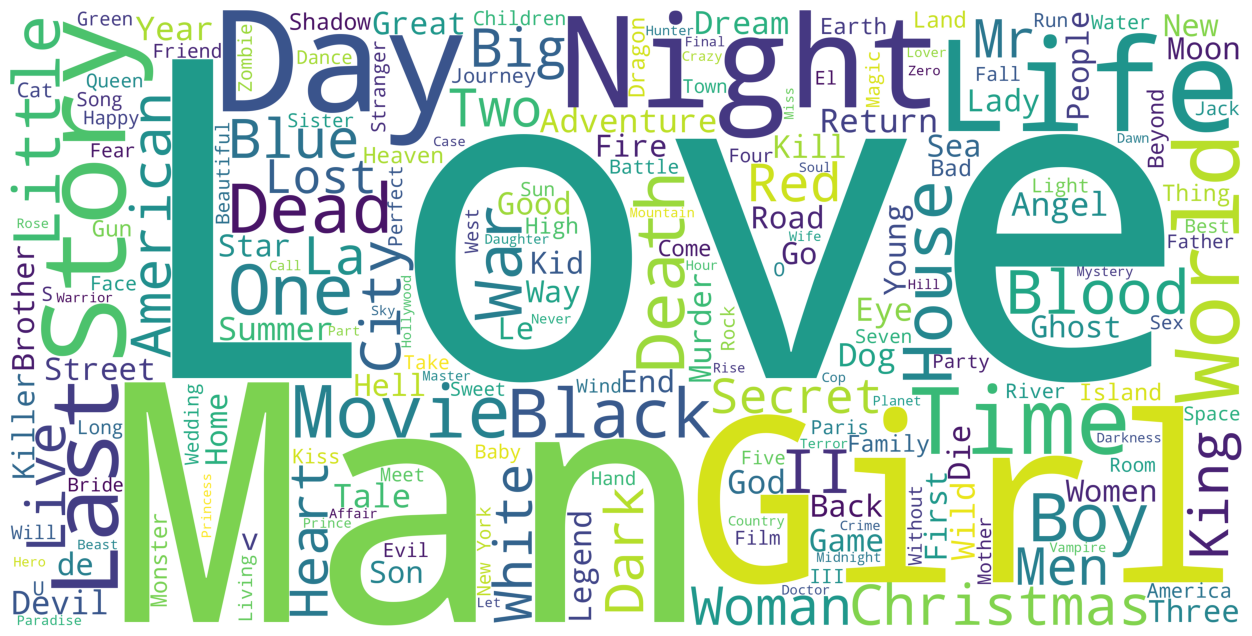

In [21]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

 - WordCloud(...): WordCloud 객체를 생성합니다. 이 객체는 단어 구름을 생성하는 데 사용됩니다.
 - stopwords=STOPWORDS: STOPWORDS는 단어 구름에서 무시할 단어 목록을 지정합니다. 일반적으로 자주 등장하지만 분석에 불필요한 단어들(예: "the", "and")을 포함합니다.
 - background_color='white': 단어 구름의 배경 색상을 흰색으로 설정합니다.
 - height=2000, width=4000: 단어 구름의 이미지 크기를 설정합니다.
 - .generate(title_corpus): title_corpus에서 단어 구름을 생성합니다


  - STOPWORDS는 WordCloud 라이브러리에 기본적으로 포함되어 있는 불용어 목록입니다. 이 목록은 자주 등장하지만 분석에 별로 도움이 되지 않는 단어들(예: "the", "and", "of")을 포함하고 있습니다.

The word Love is the most commonly used word in movie titles. Girl, Day and Man are also among the most commonly occuring words. I think this encapsulates the idea of the ubiquitious presence of romance in movies pretty well.


"Love"는 영화 제목에서 가장 자주 사용되는 단어입니다. "Girl", "Day", "Man"도 가장 자주 등장하는 단어들 중 하나입니다. 이는 영화에서 로맨스의 보편적인 존재감을 잘 보여주는 것 같습니다.

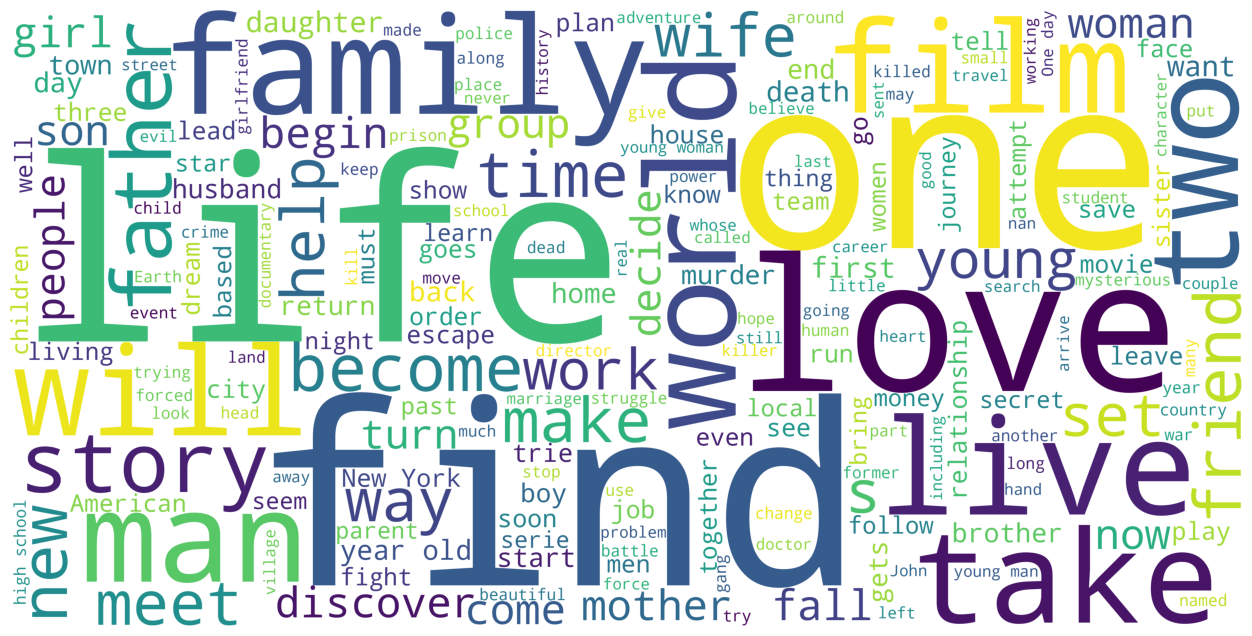

In [22]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

Life is the most commonly used word in Movie titles. One and Find are also popular in Movie Blurbs. Together with Love, Man and Girl, these wordclouds give us a pretty good idea of the most popular themes present in movies.


"Life"는 영화 제목에서 가장 자주 사용되는 단어입니다. "One"과 "Find"는 영화 개요(Blurbs)에서 자주 등장하는 단어입니다. "Love", "Man", "Girl"과 함께, 이러한 단어 구름은 영화에서 가장 인기 있는 테마를 잘 보여줍니다.

## Production Countries
The Full MovieLens Dataset consists of movies that are overwhelmingly in the English language (more than 31000). However, these movies may have shot in various locations around the world. It would be interesting to see which countries serve as the most popular destinations for shooting movies by filmmakers, especially those in the United States of America and the United Kingdom.

## 제작 국가
전체 MovieLens 데이터셋은 영어로 제작된 영화가 압도적으로 많습니다(31,000편 이상). 그러나 이러한 영화들은 전 세계 다양한 장소에서 촬영되었을 수 있습니다. 미국과 영국의 영화 제작자들이 선호하는 촬영지 국가를 살펴보는 것은 특히 흥미로울 것입니다.

In [23]:
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'] \
  .apply(lambda x :[i['name'] for i in x] if isinstance(x, list)else [])

In [24]:
s = df.apply(lambda x: pd.Series(x['production_countries']), axis=1).stack() \
  .reset_index(level=1, drop=True)
s.name = 'countries'

In [25]:
con_df = df.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index(drop=True)
con_df.head(10)

,num_movies,country
0,21153,United States of America
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India


In [26]:
con_df = con_df[con_df['country'] != 'United States of America']

In [27]:
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = "colab"

data = [ dict(
    type = 'choropleth',
    locations = con_df['country'],
    locationmode = 'country names',
    z = con_df['num_movies'],
    text = con_df['country'],
    colorscale = [[0, 'rgb(255, 255, 255)'],[1,'rgb(255, 0, 0)']],
    autocolorscale = False,
    reversescale = False,
    marker = dict(
        line = dict (
            color = 'rgb(180, 180, 180)',
            width = 0.5
        )
    ),
    colorbar = dict(
        tickprefix = '',
        title = 'Production Countries'
    ),
)]

layout = dict(
    title = 'Production Countries for the MovieLens Movies (Apart from US)',
    geo = dict(
      showframe = False,
      showcoastlines = False,
      projection = dict(
          type = 'mercator'
      )
    ),
    width = 1200,
    height = 800
)

'''
원래 캐글 코드
# fig = dict(data=data, layout=layout)
# py.iplot( fig, validate=False, filename='d3-world-map' )
'''

'''
헛소리하는 GPT 코드
# # Plotly를 사용하여 그래프를 출력
# go.Figure(fig).show()

# Plotly를 사용하여 그래프를 출력
# pyo.iplot(fig)
'''
fig = go.Figure(data=data, layout=layout)
fig.show()

Unsurprisingly, the United States is the most popular destination of production for movies given that our dataset largely consists of English movies. Europe is also an extremely popular location with the UK, France, Germany and Italy in the top 5. Japan and India are the most popular Asian countries when it comes to movie production.



당연히, 데이터셋이 주로 영어 영화로 구성되어 있어 미국이 영화 제작의 가장 인기 있는 목적지입니다. 유럽도 매우 인기 있는 장소로, 영국, 프랑스, 독일, 이탈리아가 상위 5위 안에 들어갑니다. 일본과 인도는 영화 제작 측면에서 가장 인기 있는 아시아 국가입니다.

## Franchise Movies

Let us now have a brief look at Franchise movies. I was curious to discover the longest running and the most successful franchises among many other things. Let us wrangle our data to find out!


## 프랜차이즈 영화

이제 프랜차이즈 영화에 대해 간단히 살펴보겠습니다. 저는 여러 가지 중에서 가장 오래 지속되고 가장 성공한 프랜차이즈를 발견하는 것이 궁금했습니다. 데이터를 다뤄서 알아봅시다!

In [28]:
df_fran = df[df['belongs_to_collection'].notnull()]
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'] \
  .apply(ast.literal_eval).apply(lambda x:x['name'] if isinstance(x, dict) else np.nan)
df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]

In [29]:
fran_pivot = df_fran.pivot_table(index='belongs_to_collection',
                                 values='revenue', aggfunc={'revenue' : ['mean','sum','count']}).reset_index()

### Highest Grossing Movie Franchises


### 가장 높은 수익을 올린 영화 프랜차이즈

In [30]:
fran_pivot.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


The Harry Potter Franchise is the most successful movie franchise raking in more than 7.707 billion dollars from 8 movies. The Star Wars Movies come in a close second with a 7.403 billion dollars from 8 movies too. James Bond is third but the franchise has significantly more movies compared to the others in the list and therefore, a much smaller average gross.



해리 포터 프랜차이즈는 8편의 영화로 77억 7천만 달러 이상의 수익을 올리며 가장 성공한 영화 프랜차이즈입니다. 스타워즈 영화는 8편의 영화로 74억 3천만 달러를 벌어들이며 근소한 차이로 2위를 차지했습니다. 제임스 본드는 세 번째로 높은 수익을 올렸지만, 목록에 있는 다른 프랜차이즈들에 비해 영화의 수가 훨씬 많아 평균 수익은 상대적으로 적습니다.

### Most Successful Movie Franchises (by Average Gross)

### 가장 성공한 영화 프랜차이즈 (평균 수익 기준)

We will use the average gross per movie to gauge the success of a movie franchise. However, this is not a very potent metric as the revenues in this dataset have not been adjusted for inflation. Therefore, revenue statistics will tend to strongly favor franchises in the recent times.


영화 프랜차이즈의 성공을 평가하기 위해 영화당 평균 수익을 사용할 것입니다. 하지만, 이 지표는 이 데이터셋의 수익이 물가 상승률을 반영하지 않았기 때문에 아주 강력한 지표는 아닙니다. 따라서, 수익 통계는 최근 시기의 프랜차이즈에 더 유리하게 작용할 것입니다.

In [31]:
fran_pivot.sort_values('mean', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
112,Avatar Collection,1,2.787965e+09,2.787965e+09
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
479,Frozen Collection,1,1.274219e+09,1.274219e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1388,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


The Avatar Collection, although just consisting of one movie at the moment, is the most successful franchise of all time with the sole movie raking in close to 3 billion dollars. The Harry Potter franchise is still the most successful franchise with at least 5 movies.


아바타 컬렉션은 현재 하나의 영화만 포함하고 있음에도 불구하고, 단 한 편의 영화로 거의 30억 달러를 벌어들여 역대 가장 성공적인 프랜차이즈입니다. 해리 포터 프랜차이즈는 여전히 최소 5편의 영화를 가진 가장 성공적인 프랜차이즈입니다.

### Longest Running Franchises

### 가장 오래된 프랜차이즈

Finally, in this subsection, let us take a look at the franchises which have stood the test of time and have managed to deliver the largest number of movies under a single banner. This metric is potent in the way that it isn't affected by inflation. However, this does not imply that successful movie franchises tend to have more movies. Some franchises, such as Harry Potter, have a predefined storyline and it wouldn't make sense to produce more movies despite its enormous success.


마지막으로, 이번 하위 섹션에서는 오랜 시간 동안 계속해서 많은 수의 영화를 제작한 프랜차이즈를 살펴보겠습니다. 이 지표는 인플레이션의 영향을 받지 않는다는 점에서 유용합니다. 그러나 이는 성공적인 영화 프랜차이즈가 더 많은 영화를 제작하는 경향이 있다는 것을 의미하지는 않습니다. 예를 들어, 해리 포터와 같은 프랜차이즈는 이미 정해진 스토리라인이 있어 그 엄청난 성공에도 불구하고 더 많은 영화를 제작하는 것이 의미가 없을 것입니다.

In [32]:
fran_pivot.sort_values('count', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
646,James Bond Collection,26,2.733450e+08,7.106970e+09
473,Friday the 13th Collection,12,3.874155e+07,4.648985e+08
976,Pokémon Collection,11,6.348189e+07,6.983008e+08
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
540,Halloween Collection,8,3.089601e+07,2.471681e+08
29,A Nightmare on Elm Street Collection,8,4.544894e+07,3.635916e+08
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
1432,The Pink Panther (Original) Collection,8,2.055978e+07,1.644782e+08
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
977,Police Academy Collection,7,4.352046e+07,3.046432e+08


The James Bond Movies is the largest franchise ever with over 26 movies released under the banner. Friday the 13th and Pokemon come in at a distant second and third with 12 and 11 movies respectively.

제임스 본 시리즈는 26편 이상의 영화가 제작된 가장 큰 프랜차이즈입니다. '프라이데이 더 13th'와 '포켓몬'은 각각 12편과 11편의 영화로 두 번째와 세 번째에 해당합니다.

### Production Companies

### 제작사

In [33]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [34]:
s = df.apply(lambda x: pd.Series(x['production_companies']), axis=1).stack().reset_index(level=1, drop=True)
s.name='companies'

In [35]:
com_df = df.drop('production_companies', axis=1).join(s)

In [36]:
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

### Highest Earning Production Companies
Let us find out which production companies have earned the most money from the movie making business.

### 가장 많은 수익을 올린 제작사
영화 제작 산업에서 가장 많은 수익을 올린 제작사가 어떤 곳인지 알아보겠습니다.

In [37]:
com_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
companies,,,
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
Columbia Pictures,3.227974e+10,1.367785e+08,236
New Line Cinema,2.217339e+10,1.119868e+08,198
Amblin Entertainment,1.734372e+10,2.550547e+08,68
DreamWorks SKG,1.547575e+10,1.984071e+08,78


Warner Bros is the highest earning production company of all time earning a staggering 63.5 billion dollars from close to 500 movies. Universal Pictures and Paramaount Pictures are the second and the third highest earning companies with 55 billion dollars and 48 billion dollars in revenue respectively.



워너 브로스(Warner Bros)는 지금까지 가장 많은 수익을 올린 제작사로, 약 500편의 영화에서 무려 635억 달러를 벌어들였습니다. 유니버설 픽처스(Universal Pictures)와 파라마운트 픽처스(Paramount Pictures)는 각각 550억 달러와 480억 달러의 수익을 올리며 두 번째와 세 번째로 높은 수익을 기록한 제작사입니다.

## Most Succesful Production Companies
Which production companies produce the most succesful movies on average? Let us find out. We will only consider those companies that have made at least 15 movies.


### 가장 성공적인 제작사
어떤 제작사가 평균적으로 가장 성공적인 영화를 제작하는지 알아보겠습니다. 단, 최소 15편 이상의 영화를 제작한 제작사만을 고려하겠습니다.

In [38]:
com_pivot[com_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)

,Total,Average,Number
companies,,,
Pixar Animation Studios,1.118853e+10,6.215852e+08,18
Marvel Studios,1.169964e+10,6.157703e+08,19
Revolution Sun Studios,8.120339e+09,5.413559e+08,15
Lucasfilm,9.898421e+09,4.499282e+08,22
DreamWorks Animation,1.370752e+10,4.031622e+08,34
DC Entertainment,6.212609e+09,3.882880e+08,16
Dentsu,6.853205e+09,3.807336e+08,18
Jerry Bruckheimer Films,8.957441e+09,3.732267e+08,24
Marvel Enterprises,6.538067e+09,3.441088e+08,19


Pixar Animation Studios has produced the most successful movies, on average. This is not surprising considering the amazing array of movies that it has produced in the last few decades: Up, Finding Nemo, Inside Out, Wall-E, Ratatouille, the Toy Story Franchise, Cars Franchise, etc. Marvel Studios with an average gross of 615 million dollars comes in second with movies such as Iron Man and The Avengers under its banner.


픽사 애니메이션 스튜디오(Pixar Animation Studios)는 평균적으로 가장 성공적인 영화를 제작한 제작사입니다. 이는 최근 몇십 년간 제작한 놀라운 영화들 때문입니다: 《업》, 《니모를 찾아서》, 《인사이드 아웃》, 《월-E》, 《라따뚜이》, 토이 스토리 시리즈, 카스 시리즈 등이 있습니다. 평균 매출 6억 1500만 달러를 기록한 마블 스튜디오(Marvel Studios)가 두 번째로 성공적인 제작사입니다. 아이언맨과 어벤져스와 같은 영화들이 그 대표작입니다.

### Original Language
In this section, let us look at the languages of the movies in our dataset. From the production countries, we have already deduced that the majority of the movies in the dataset ar English. Let us see what the other major languages represented are.


### 원어 (Original Language)
이번 섹션에서는 데이터셋에 포함된 영화들의 언어를 살펴보겠습니다. 제작 국가에서 이미 대부분의 영화가 영어로 되어 있다는 것을 알 수 있었습니다. 이제 다른 주요 언어들이 어떤 것들이 있는지 알아보겠습니다.

In [39]:
df['original_language'].drop_duplicates().shape[0]

93

In [40]:
lang_df = pd.DataFrame(df['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number','language']
lang_df.head()

,number,language
original_language,,
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


There are over 93 languages represented in our dataset. As we had expected, English language films form the overwhelmingly majority. French and Italian movies come at a very distant second and third respectively. Let us represent the most popular languages (apart from English) in the form of a bar plot.


우리 데이터셋에는 93개 이상의 언어가 포함되어 있습니다. 예상한 대로 영어 영화가 압도적으로 많습니다. 프랑스어와 이탈리아어 영화가 각각 매우 먼 순위로 두 번째와 세 번째를 차지합니다. 영어를 제외한 가장 인기 있는 언어들을 막대 그래프 형태로 시각화해 보겠습니다.

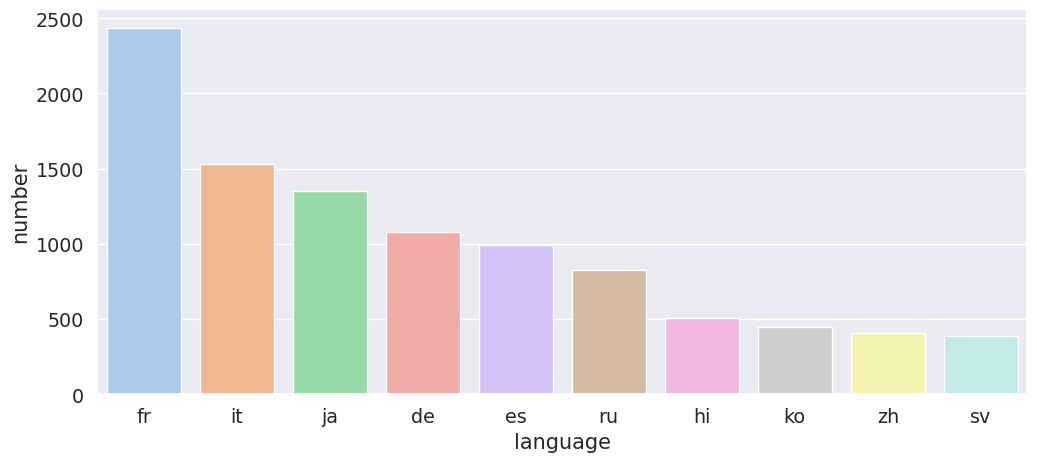

In [41]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11], palette='pastel')
plt.show()

As mentioned earlier, French and Italian are the most commonly occurring languages after English. Japanese and Hindi form the majority as far as Asian Languages are concerned.


앞서 언급한 바와 같이, 프랑스어와 이탈리아어는 영어 다음으로 가장 많이 발생하는 언어입니다. 일본어와 힌디어는 아시아 언어 중에서 가장 많이 사용되는 언어들입니다.

### Popularity, Vote Average and Vote Count
In this section, we will work with metrics provided to us by TMDB users. We will try to gain a deeper understanding of the popularity, vote average and vote count features and try and deduce any relationships between them as well as other numeric features such as budget and revenue.


### 인기, 평균 평점 및 투표 수
이 섹션에서는 TMDB 사용자들이 제공한 메트릭을 사용하여 분석을 진행합니다. 인기, 평균 평점, 투표 수와 같은 특성을 자세히 살펴보고, 이들과 예산 및 수익과 같은 다른 숫자 특성 간의 관계를 추론해보겠습니다.

In [42]:
def clean_numeric(x):
  try:
    return float(x)
  except:
    return np.nan

In [43]:
df['popularity'] = df['popularity'].apply(clean_numeric).astype('float')
df['vote_count'] = df['vote_count'].apply(clean_numeric).astype('float')
df['vote_average'] = df['vote_average'].apply(clean_numeric).astype('float')

Let us examine the summary statistics and the distribution of each feature one by one.

각 특징의 요약 통계와 분포를 하나씩 살펴보자.

In [44]:
df['popularity'].describe()

,popularity
count,45460.000000
mean,2.921478
std,6.005414
min,0.000000
25%,0.385948
50%,1.127685
75%,3.678902
max,547.488298


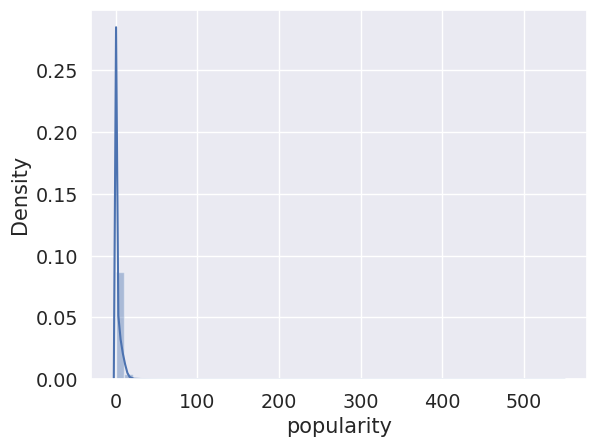

In [45]:
sns.distplot(df['popularity'].fillna(df['popularity'].median()))
plt.show()

<Axes: ylabel='Frequency'>

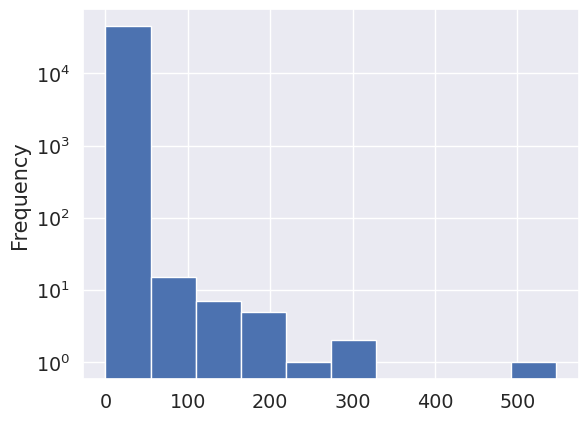

In [46]:
df['popularity'].plot(logy=True, kind='hist')

The Popularity score seems to be an extremely skewed quentity with a mean of only 2.9 but maximum values reaching as high as 547, which is almost 1800% greater than the mean. However, as can be seen from the distribution plot, almost all movies have a popularity score less than 10 (the 75th percentile is at 3.678902).

인기도 점수(Popularity score)는 평균이 2.9에 불과하지만 최대값이 547에 이르는 매우 왜곡된 분포를 보인다. 이는 평균보다 거의 1800% 높은 값이다. 그러나 분포도를 보면 거의 모든 영화의 인기도 점수가 10 미만인 것을 알 수 있으며, 75번째 백분위수는 3.678902에 위치해 있다.

### Most Popular Movies by Popularity Score

### 인기도 점수 기준으로 가장 인기 있는 영화들

In [47]:
df[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)

,title,popularity,year
30700,Minions,547.488298,2015
33356,Wonder Woman,294.337037,2017
42222,Beauty and the Beast,287.253654,2017
43644,Baby Driver,228.032744,2017
24455,Big Hero 6,213.849907,2014
26564,Deadpool,187.860492,2016
26566,Guardians of the Galaxy Vol. 2,185.330992,2017
14551,Avatar,185.070892,2009
24351,John Wick,183.870374,2014
23675,Gone Girl,154.801009,2014


Minions is the most popular movie by the TMDB Popularity Score. Wonder Woman and Beauty and the Beast, two extremely successful woman centric movies come in second and third respectively.


TMDB 인기도 점수 기준으로 가장 인기 있는 영화는 '미니언즈'입니다. '원더 우먼'과 '미녀와 야수'는 각각 두 번째와 세 번째로 매우 성공적인 여성 중심 영화들입니다.

In [48]:
df['vote_count'].describe()

,vote_count
count,45460.000000
mean,109.897338
std,491.310374
min,0.000000
25%,3.000000
50%,10.000000
75%,34.000000
max,14075.000000


As with popularity scores, the distribution of vote counts is extremely skewed with the median vote count standing at a paltry 10 votes. The most votes a single movie has got stands at 14,075. TMDB Votes, therefore, are not as potent and suggestive as its IMDB Counterpart. Nevertheless, let us check which the most voted on movies on the website are.

인기도 점수와 마찬가지로 투표 수의 분포도 매우 왜곡되어 있으며, 중앙값 투표 수는 겨우 10표에 불과합니다. 한 영화가 받은 가장 많은 투표 수는 14,075표입니다. 따라서 TMDB 투표는 IMDB 투표와 비교할 때 그 영향력이 크지 않습니다. 그럼에도 불구하고, 웹사이트에서 가장 많은 투표를 받은 영화들을 확인해 봅시다.

### Most Voted on Movies

In [49]:
df[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,year
15480,Inception,14075.0,2010
12481,The Dark Knight,12269.0,2008
14551,Avatar,12114.0,2009
17818,The Avengers,12000.0,2012
26564,Deadpool,11444.0,2016
22879,Interstellar,11187.0,2014
20051,Django Unchained,10297.0,2012
23753,Guardians of the Galaxy,10014.0,2014
2843,Fight Club,9678.0,1999
18244,The Hunger Games,9634.0,2012


Inception and The Dark Knight, two critically acclaimed and commercially successful Christopher Nolan movies figure at the top of our chart.


'인셉션'과 '다크 나이트', 두 편의 비평가들의 찬사를 받고 상업적으로 성공한 크리스토퍼 놀란의 영화가 우리 차트의 상위에 있습니다.

In [50]:
df['vote_average'] = df['vote_average'].replace(0, np.nan)
df['vote_average'].describe()

,vote_average
count,42462.000000
mean,6.014877
std,1.256208
min,0.500000
25%,5.300000
50%,6.100000
75%,6.900000
max,10.000000


<Axes: xlabel='vote_average', ylabel='Density'>

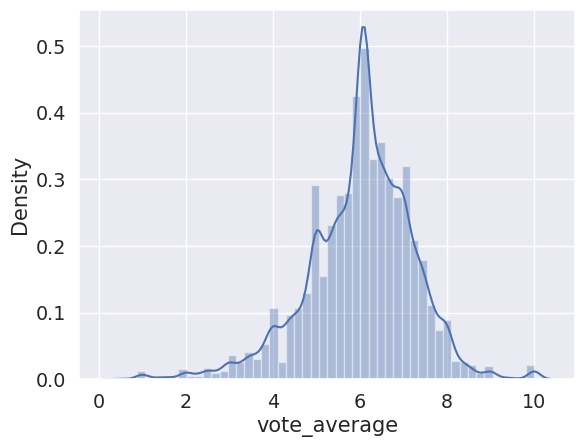

In [51]:
sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))

It appears that TMDB Users are extremely strict in their ratings. The mean rating is only a 5.6 on a scale of 10. Half the movies have a rating of less than or equal to 6. Let us check what the most critically acclaimed movies as per TMDB are. We will only consider those movies that have more than 2000 votes (similar to IMDB's criteria of 5000 votes in selecting its top 250).


TMDB 사용자들은 평가에 매우 엄격한 것으로 보입니다. 평균 평점이 10점 만점에 겨우 5.6입니다. 절반의 영화는 평점이 6 이하입니다. TMDB에서 가장 비평가들의 찬사를 받은 영화를 확인해 봅시다. 여기서는 2000표 이상을 받은 영화만 고려할 것입니다 (IMDB의 상위 250 선정 기준인 5000표와 유사하게).

### Most Critically Acclaimed Movies

### 가장 비평가들의 찬사를 받은 영화들

In [52]:
df[df['vote_count'] > 2000][['title', 'vote_average', 'vote_count' ,'year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,year
314,The Shawshank Redemption,8.5,8358.0,1994
834,The Godfather,8.5,6024.0,1972
2211,Life Is Beautiful,8.3,3643.0,1997
5481,Spirited Away,8.3,3968.0,2001
1152,One Flew Over the Cuckoo's Nest,8.3,3001.0,1975
1176,Psycho,8.3,2405.0,1960
2843,Fight Club,8.3,9678.0,1999
1178,The Godfather: Part II,8.3,3418.0,1974
12481,The Dark Knight,8.3,12269.0,2008
292,Pulp Fiction,8.3,8670.0,1994


The Shawshank Redemption and The Godfather are the two most critically acclaimed movies in the TMDB Database. Interestingly, they are the top 2 movies in IMDB's Top 250 Movies list too. They have a rating of over 9 on IMDB as compared to their 8.5 TMDB Scores.

'쇼생크 탈출'과 '대부'는 TMDB 데이터베이스에서 가장 비평가들의 찬사를 받은 두 영화입니다. 흥미롭게도, 이 두 영화는 IMDB의 상위 250 영화 리스트에서도 상위 2위에 해당합니다. IMDB에서는 이들 영화의 평점이 9를 넘는 반면, TMDB에서는 평점이 8.5입니다.

Do popularity and vote average share a tangible relationship? In other words, is there a strong positive correlation between these two quanitties? Let us visualise their relationship in the form of a scatterplot.

인기도와 평균 투표 수 사이에 실질적인 관계가 있을까요? 다시 말해, 이 두 변수 간에 강한 양의 상관관계가 있는지 살펴보겠습니다. 이들의 관계를 산점도로 시각화해 보겠습니다.

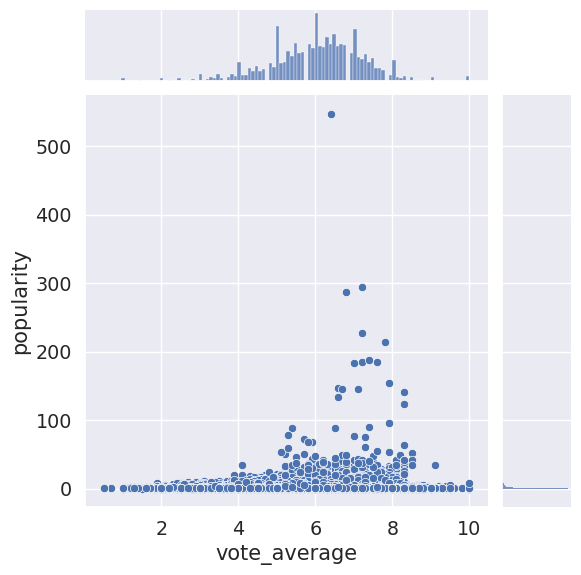

In [53]:
sns.jointplot(x='vote_average', y='popularity', data=df)

Surprisingly, the Pearson Coefficient of the two aforementioned quantities is a measly 0.097 which suggests that there is no tangible correlation. In other words, popularity and vote average and independent quantities. It would be interesting to discover how TMDB assigns numerical popularity scores to its movies.


놀랍게도, 앞서 언급한 두 변수의 피어슨 상관 계수는 0.097로 매우 낮아서 실질적인 상관관계가 없음을 시사합니다. 다시 말해, 인기도와 평균 투표 수는 독립적인 변수입니다. TMDB가 영화에 수치적 인기도 점수를 어떻게 부여하는지 알아보는 것도 흥미로울 것입니다.

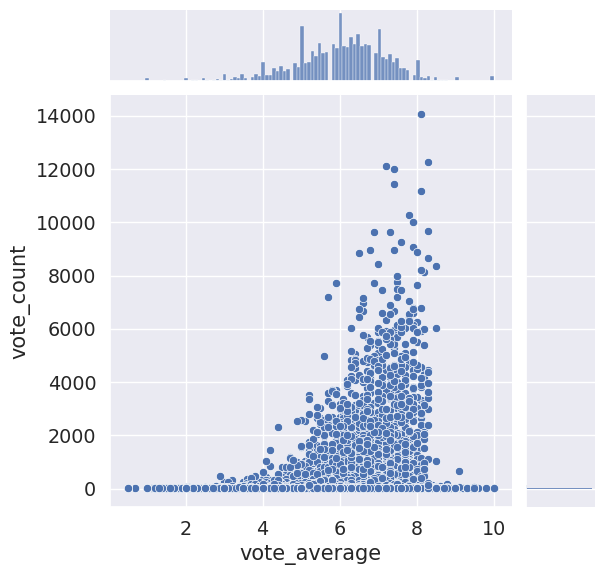

In [54]:
sns.jointplot(x='vote_average', y='vote_count', data=df)

There is a very small correlation between Vote Count and Vote Average. A large number of votes on a particular movie does not necessarily imply that the movie is good.


투표 수와 평균 투표 수 간에는 매우 작은 상관관계가 있습니다. 특정 영화에 많은 투표가 있다고 해서 그 영화가 반드시 좋은 영화라는 의미는 아닙니다.

### Movie Release Dates
Release Dates can often play a very important role in determining the success and the revenue generated by a particular movie. In this section, we will try and gain insights about release dates in terms of years, months and days of the week.

We have already constructed the year feature in our preliminary data wrangling step. Let us now extract the month and day too for each movie with a release date.


출시일은 특정 영화의 성공과 수익을 결정하는 데 중요한 역할을 할 수 있습니다. 이 섹션에서는 연도, 월, 주일의 날을 기준으로 출시일에 대한 통찰을 얻어 보겠습니다.

우리는 이미 데이터 전처리 단계에서 연도(feature)를 추출했습니다. 이제 각 영화의 출시일에서 월과 주일의 날도 추출하겠습니다.

In [55]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [56]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [57]:
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [58]:
df['day'] = df['release_date'].apply(get_day)
df['month'] = df['release_date'].apply(get_month)

With these features in hand, let us now check the most popular and most successful months and days.


이러한 기능을 가지고, 이제 가장 인기 있는 월과 가장 성공적인 요일을 살펴보겠습니다.

<Axes: title={'center': 'Number of Movies released in a particular month.'}, xlabel='month', ylabel='count'>

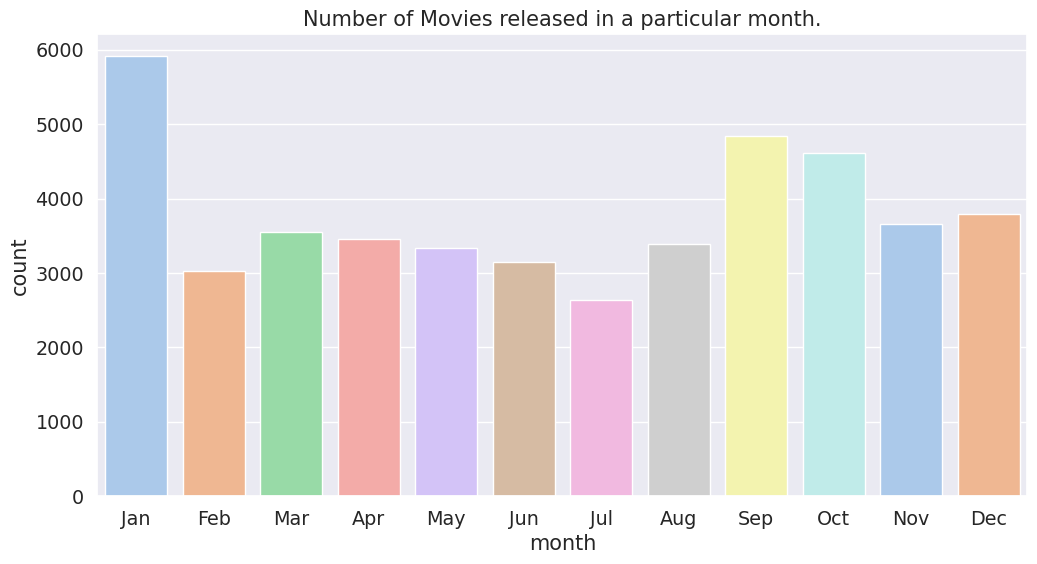

In [59]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=df, order=month_order, palette='pastel')

It appears that January is the most popular month when it comes to movie releases. In Hollywood circles, this is also known as the the dump month when sub par movies are released by the dozen.

In which months do bockbuster movies tend to release? To answer this question, we will consider all movies that have made in excess of 100 million dollars and calculate the average gross for each month.



1월이 영화 출시의 가장 인기 있는 달로 보입니다. 할리우드에서는 1월을 '덤프 달(dump month)'이라고도 부르며, 이 시기에 품질이 떨어지는 영화들이 많이 개봉됩니다.

블록버스터 영화들은 어떤 달에 출시되는 경향이 있을까요? 이 질문에 답하기 위해, 1억 달러 이상의 수익을 올린 모든 영화를 고려하고, 각 달의 평균 총수익을 계산해 보겠습니다.

<Axes: title={'center': 'Average Gross by the Month for Blockbuster Movies'}, xlabel='mon', ylabel='revenue'>

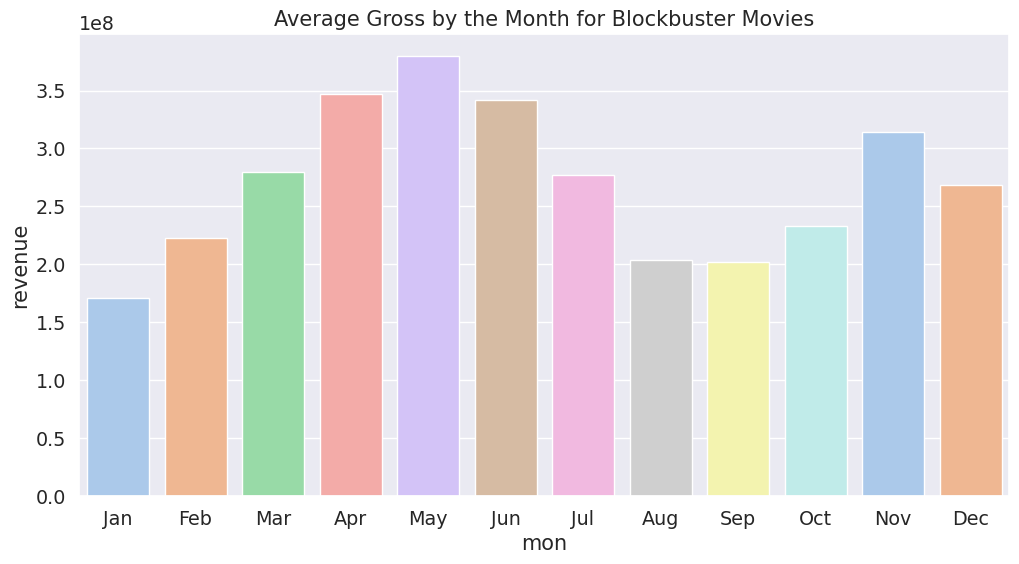

In [60]:
month_mean = pd.DataFrame(df[df['revenue'] > 1e8].groupby('month')['revenue'].mean())
month_mean['mon'] = month_mean.index
plt.figure(figsize=(12,6))
plt.title("Average Gross by the Month for Blockbuster Movies")
sns.barplot(x='mon', y='revenue', data=month_mean, order=month_order, palette='pastel')

We see that the months of April, May and June have the highest average gross among high grossing movies. This can be attributed to the fact that blockbuster movies are usually released in the summer when the kids are out of school and the parents are on vacation and therefore, the audience is more likely to spend their disposable income on entertainment.

Do some months tend to be more successful than others? Let us visualise the boxplot between the return and the months.


4월, 5월, 6월이 높은 수익을 올린 영화들 중에서 가장 높은 평균 총수익을 기록하고 있습니다. 이는 블록버스터 영화가 여름에 개봉하는 경향이 있기 때문일 수 있습니다. 여름에는 아이들이 학교에 가지 않고 부모들도 휴가를 가므로 관객들이 여가에 더 많은 돈을 쓸 가능성이 높아지기 때문입니다.

어떤 달이 다른 달보다 더 성공적인 경향이 있을까요? 이 질문에 답하기 위해, 수익(Return)과 달(month) 간의 박스플롯을 시각화해 보겠습니다.

(0.0, 12.0)

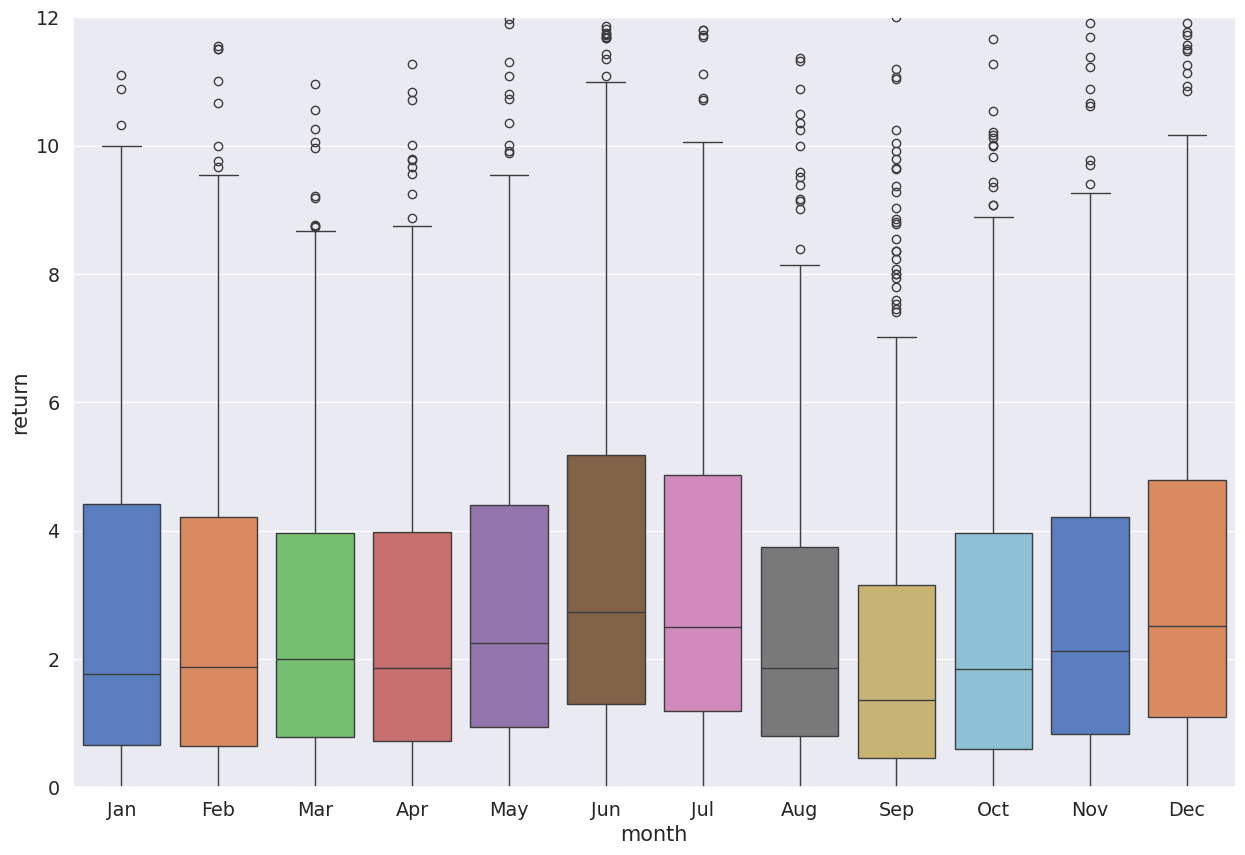

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 10))
sns.boxplot(x='month', y='return', data=df[df['return'].notnull()], palette="muted", ax =ax, order=month_order)
ax.set_ylim([0, 12])

The months of June and July tend to yield the highest median returns. September is the least successful months on the aforementioned metrics. Again, the success of June and July movies can be attributed to them being summer months and times of vacation. September usually denotes the beginning of the school/college semester and hence a slight reduction in the consumption of movies.

Let us now have a look at the most popular days as we did for months.



6월과 7월은 가장 높은 중앙값 수익을 기록하는 경향이 있습니다. 반면, 9월은 위의 지표에서 가장 성공적인 달이 아닙니다. 6월과 7월의 성공은 여름철과 휴가 시즌에 맞물려 많은 사람들이 영화를 보는 경향 때문일 수 있습니다. 9월은 보통 학기 시작을 의미하므로 영화 소비가 약간 감소할 수 있습니다.

이제 월과 마찬가지로 가장 인기 있는 요일을 살펴보겠습니다.

<Axes: title={'center': 'Number of Movies released on a particular day.'}, xlabel='day', ylabel='count'>

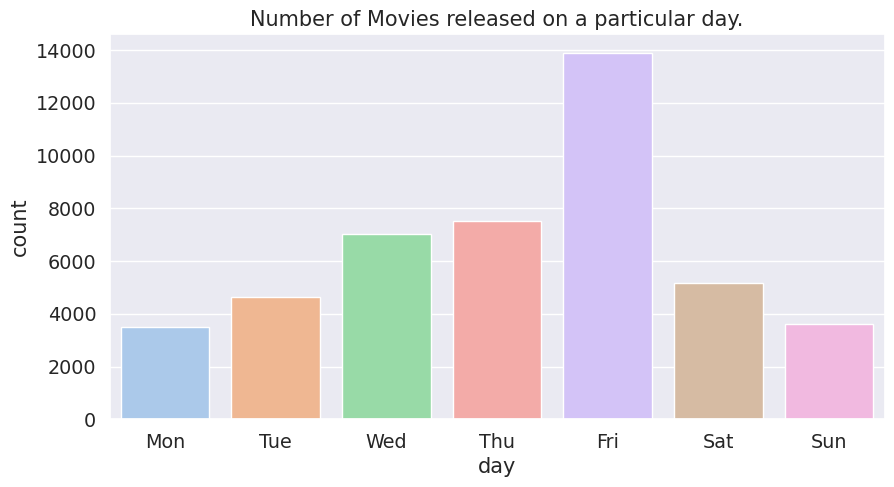

In [62]:
plt.figure(figsize=(10,5))
plt.title("Number of Movies released on a particular day.")
sns.countplot(x='day', data=df, order=day_order, palette = 'pastel')

Friday is clearly the most popular day for movie releases. This is understandable considering the fact that it usually denotes the beginning of the weekend. Sunday and Monday are the least popular days and this can be attributed to the same aforementioned reason.


금요일은 영화 출시의 가장 인기 있는 날로 보입니다. 이는 주말의 시작을 의미하는 날이기 때문에 이해할 수 있습니다. 일요일과 월요일은 가장 인기 없는 날이며, 이는 앞서 언급한 이유와 동일한 맥락으로 해석될 수 있습니다.

Number of Movies by the year
The Dataset of 45,000 movies available to us does not represent the entire corpus of movies released since the inception of cinema. However, it is reasomnable to assume that it does include almost every major film released in Hollywood as well as other major film industries across the world (such as Bollywood in India). With this assumption in mind, let us take a look at the number of movies produced by the year.


연도별 영화 수

우리가 가지고 있는 45,000편의 영화 데이터셋은 영화가 시작된 이래로 출시된 모든 영화를 대표하지는 않습니다. 하지만 할리우드뿐만 아니라 인도의 볼리우드와 같은 세계 주요 영화 산업에서 출시된 거의 모든 주요 영화를 포함하고 있다고 가정하는 것이 합리적입니다. 이러한 가정을 바탕으로 연도별로 제작된 영화 수를 살펴보겠습니다.




<Axes: xlabel='year'>

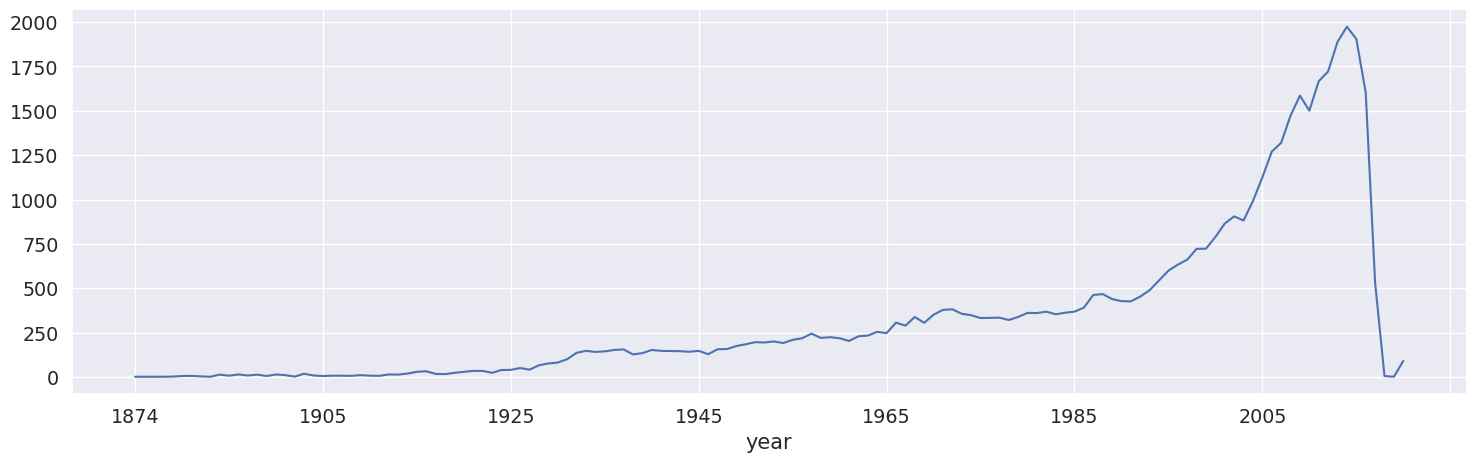

In [63]:
year_count = df.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
year_count.plot()

We notice that there is a sharp rise in the number of movies starting the 1990s decade. However, we will not look too much into this as it is entirely possible that recent movies were oversampled for the purposes of this dataset.

Next, let us take a look at the earliest movies represented in the dataset.


1990년대부터 영화 수가 급격히 증가한 것을 알 수 있습니다. 그러나 이 데이터셋의 목적상 최근 영화들이 과도하게 샘플링되었을 가능성이 있기 때문에 이에 대해 깊이 살펴보지는 않겠습니다.

다음으로, 이 데이터셋에 포함된 가장 초기의 영화를 살펴보겠습니다.

Earliest Movies Represented

가장 초기의 영화들

In [64]:
df[df['year'] != 'NaT'][['title', 'year']].sort_values('year').head(10)

,title,year
34940,Passage of Venus,1874
34937,Sallie Gardner at a Gallop,1878
41602,Buffalo Running,1883
34933,Man Walking Around a Corner,1887
34934,Accordion Player,1888
34938,Traffic Crossing Leeds Bridge,1888
34936,"Monkeyshines, No. 2",1890
34939,London's Trafalgar Square,1890
34935,"Monkeyshines, No. 1",1890
41194,Mosquinha,1890


The oldest movie, Passage of Venus, wss a series of photographs of the transit of the planet Venus across the Sun in 1874. They were taken in Japan by the French astronomer Pierre Janssen using his 'photographic revolver'. This is also the oldest movie on both IMDB and TMDB.


가장 오래된 영화인 **"비너스의 통과(Passage of Venus)"**는 1874년에 금성이 태양을 통과하는 모습을 촬영한 일련의 사진입니다. 이 사진들은 프랑스 천문학자 피에르 얀센이 일본에서 그의 '사진 리볼버'를 사용하여 촬영한 것입니다. 이 영화는 IMDB와 TMDB 모두에서 가장 오래된 영화로 기록되어 있습니다.



Finally, in this section, let us construct a heatmap to indicate movie releases by month and year for all movies released in this century. This will give us a good idea of the hot and cold months for movie buffs.

마지막으로, 이 섹션에서는 이번 세기에 개봉된 모든 영화를 대상으로 연도와 월별 영화 개봉 현황을 나타내는 히트맵을 구성해 보겠습니다. 이를 통해 영화 애호가들에게 인기가 많은 달과 그렇지 않은 달을 파악할 수 있을 것입니다.

In [65]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

In [66]:
df_21 = df.copy()
df_21['year'] = df_21[df_21['year'] != 'NaT']['year'].astype(int)
df_21 = df_21[df_21['year'] >=2000]
hmap_21 = pd.pivot_table(data=df_21, index='month', columns='year', aggfunc='count', values='title')
hmap_21 = hmap_21.fillna(0)

<Axes: xlabel='year', ylabel='month'>

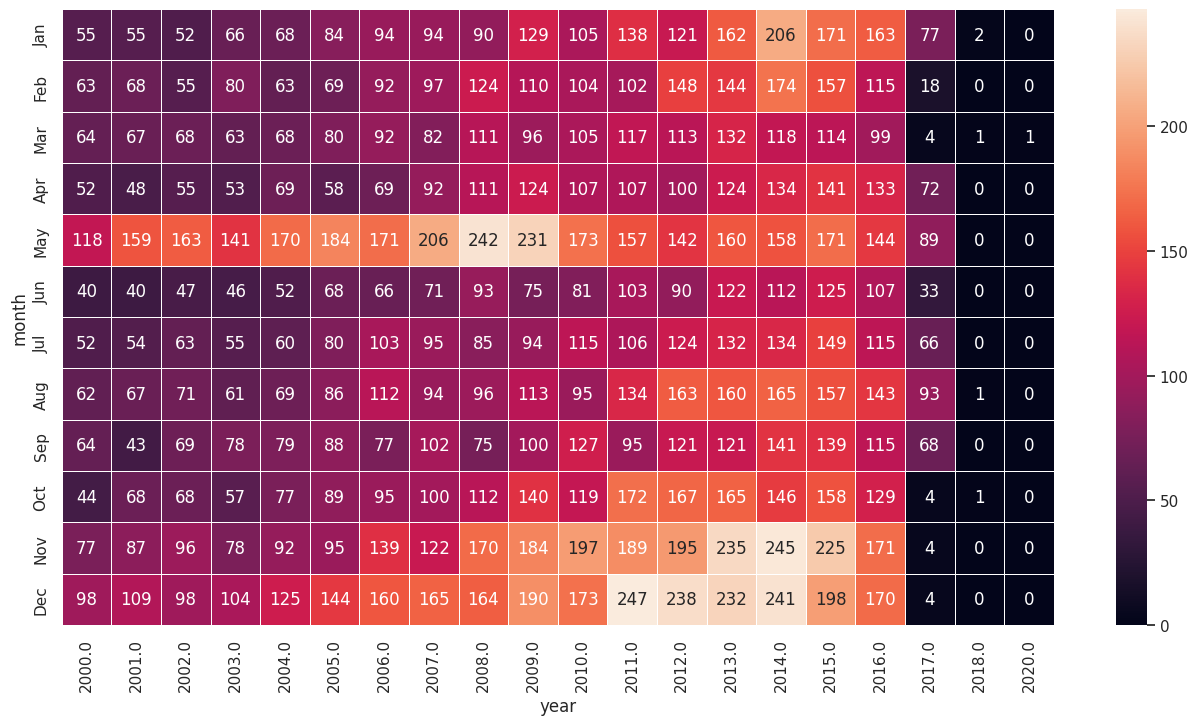

In [67]:
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(hmap_21, annot=True, linewidths=.5, ax=ax, fmt='n', yticklabels=month_order)

In [68]:
sns.set(font_scale=1.25)

Movie Status
Although not entirely relevant to our analysis of movies, gathering information on the various kinds of movies based on their status of release can provide us interesitng insight on the nature of the movies present in our dataset. My preliminary hunch was that almost every movie has the Released status. Let's find out.

영화 상태

영화 상태에 따른 다양한 종류의 영화를 조사하는 것은 우리의 영화 분석과는 직접적인 관련이 없을 수도 있지만, 데이터셋에 포함된 영화들의 성격에 대한 흥미로운 통찰을 제공할 수 있습니다. 예비 추측으로는 거의 모든 영화가 "Released" 상태일 것이라고 생각했습니다. 이를 확인해 봅시다.

In [69]:
df['status'].value_counts()

,count
status,
Released,45014
Rumored,230
Post Production,98
In Production,20
Planned,15
Canceled,2


Almost every movie is indeed released. However, it is interesting to see that MovieLens has user ratings for movies that are still in the planning, production and post production stage. We might take this information into account while building our collaborative filtering recommendation engine.

거의 모든 영화가 실제로 개봉된 상태인 것은 맞습니다. 그러나 MovieLens에서 아직 기획, 제작, 후반 작업 단계에 있는 영화들에 대한 사용자 평점이 있다는 점은 흥미롭습니다. 이 정보를 고려하여 협업 필터링 추천 엔진을 구축할 때 도움이 될 수 있습니다.

Spoken Languages
Does the number of spoken languages influence the success of a movie? To do this, we will convert our spoken_languages feature to a numeric feature denoting the number of languages spoken in that film.

사용 언어
사용 언어 수가 영화의 성공에 영향을 미치는지 알아보겠습니다. 이를 위해, spoken_languages 특성을 해당 영화에서 사용된 언어 수를 나타내는 숫자형 특성으로 변환할 것입니다.

In [70]:
df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(ast.literal_eval).apply(lambda x: len(x) if isinstance(x, list) else np.nan)

In [71]:
df['spoken_languages'].value_counts()

,count
spoken_languages,
1,33736
2,5371
0,3835
3,1705
4,550
5,178
6,62
7,14
8,6


Most movies have just one language spoken in the entire duration of the film. 19 is the higest number of languages spoken in a film. Let us take a look at all the films with more than 10 spoken languages.

대부분의 영화는 전체 상영 시간 동안 하나의 언어만 사용됩니다. 한 영화에서 사용된 언어 수의 최댓값은 19개입니다. 10개 이상의 언어가 사용된 모든 영화를 살펴보겠습니다.

In [72]:
df[df['spoken_languages'] >= 10][['title', 'year', 'spoken_languages']].sort_values('spoken_languages', ascending=False)

,title,year,spoken_languages
22235,Visions of Europe,2004,19
35288,The Testaments,2000,13
14093,To Each His Own Cinema,2007,12
8789,The Adventures of Picasso,1978,10


The movie with the most number of languages, Visions of Europe is actually a collection of 25 short films by 25 different European directors. This explains the sheer diversity of the movie in terms of language.

가장 많은 언어가 사용된 영화인 **"Visions of Europe"**는 실제로 25명의 서로 다른 유럽 감독들이 만든 25개의 단편 영화로 구성된 컬렉션입니다. 이 영화는 다양한 감독들이 참여했기 때문에 언어 면에서 그만큼 다양한 요소를 포함하고 있는 것입니다.